# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-19 09:58:07--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-11-19 09:58:08 (5.31 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,756,95,53,95,202,65,10,193,34,22,160,220,559,237,71,3,2,188,196
1,151,94,44,84,216,74,6,184,35,22,145,208,525,154,73,4,22,196,197
2,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197
3,422,90,34,66,158,59,7,140,47,18,124,165,298,117,61,1,3,201,207
4,741,87,39,74,165,66,6,145,45,19,134,173,318,139,70,3,21,195,200
5,547,88,44,70,151,61,8,143,46,18,143,163,311,173,68,7,8,196,203
6,287,88,43,84,136,55,11,154,44,19,150,174,350,164,73,6,2,185,196
7,175,88,40,78,186,73,6,158,41,20,134,185,379,148,73,1,11,193,197
8,399,87,42,64,150,64,10,133,50,18,141,157,265,159,67,7,0,193,201
9,86,89,41,84,141,58,9,149,45,19,145,172,330,162,72,4,18,188,200


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.535519,93.437158,44.511840,81.719490,168.462659,61.653916,8.484517,167.883424,41.163934,20.510018,147.227687,187.708561,434.830601,172.850638,72.349727,6.196721,12.856102,188.943534,195.726776
std,244.246139,8.101892,6.245169,15.957105,33.799335,7.994095,4.385011,32.910699,7.858378,2.558511,14.935661,30.882381,173.092963,32.656746,7.220062,4.892411,9.269449,6.126294,7.368682
min,3.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,210.000000,88.000000,39.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,135.000000,167.000000,314.000000,147.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,423.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,178.000000,361.000000,172.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,631.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,188.000000,320.000000,987.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
lr.fit(X_train, y_train)

print('accuracy_score=', accuracy_score(lr.predict(X_test), y_test))
print('f1_score=', f1_score(lr.predict(X_test), y_test, average='macro'))

accuracy_score= 0.7508417508417509
f1_score= 0.7320768980478336


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


**Примечание Автора:** Looks like not bad, но можно было сделать GridSearch и получить прирост точности, но сомневаюсь что он будеть большим

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


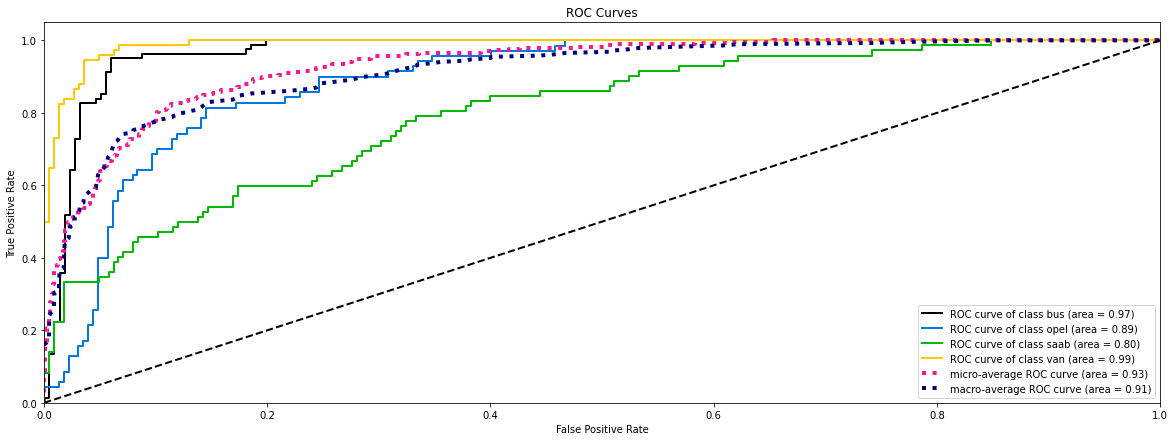

In [8]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot
import scikitplot as scplt
scplt.metrics.plot_roc(y_test, lr.predict_proba(X_test), figsize=(20, 7))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

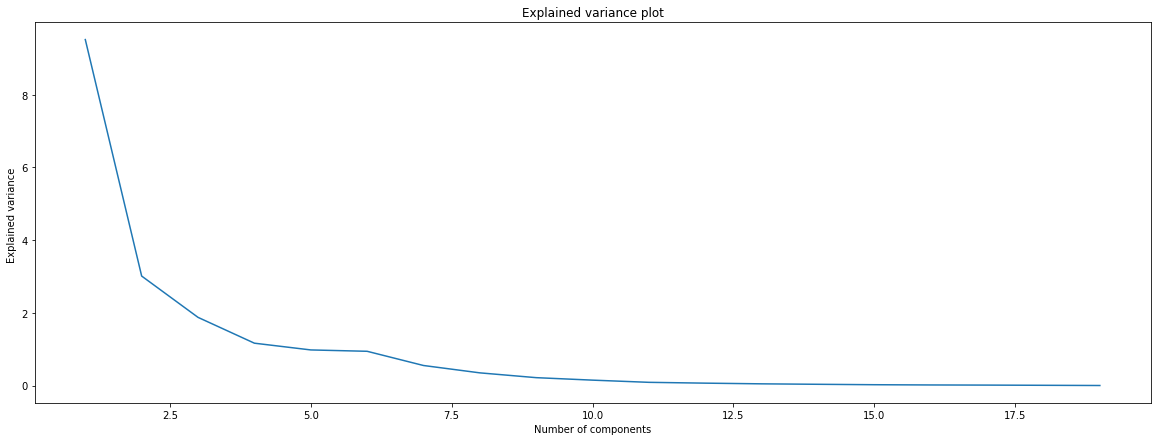

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA().fit(scaler.fit_transform(X_train, y_train))

plt.figure(figsize=(20, 7))
plt.title('Explained variance plot')
plt.plot(np.arange(1, pca.explained_variance_.shape[0] + 1), pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Давайте сначала поймём сколько компонент нам нужно взять.

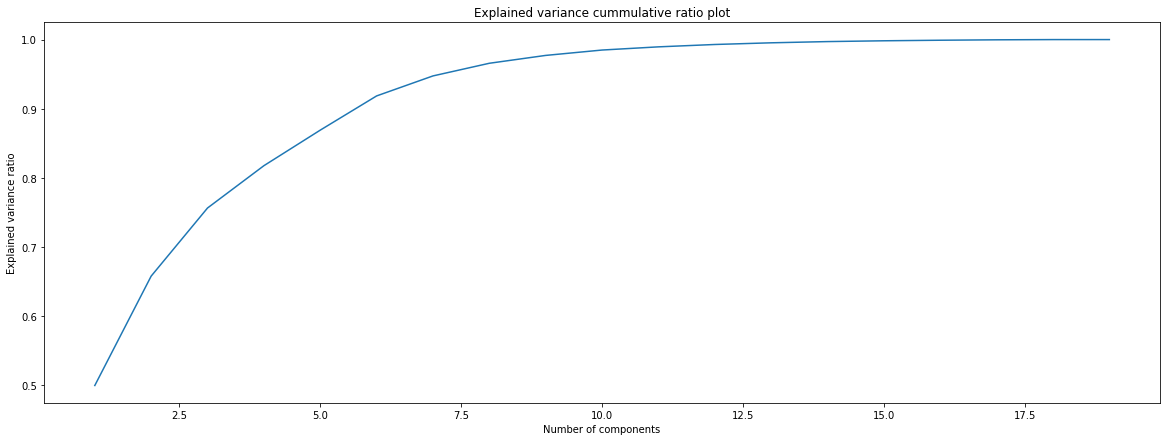

In [10]:
plt.figure(figsize=(20, 7))
plt.title('Explained variance cummulative ratio plot')
plt.plot(np.arange(1, pca.explained_variance_.shape[0] + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

Очевидно что при ~11 компонентах, доля Explained variance достигает 99, значит этого количества признаков нам бует достаточно

In [11]:
n_components = 11

pca = PCA(n_components=n_components)
pca.fit(scaler.fit_transform(X_train, y_train))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

p = Pipeline([
    ('scale', StandardScaler()),
    ('pca', pca),
    ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))
])

params = {
    'clf__C' : np.linspace(1, 10, 100)
}

lr = GridSearchCV(p, params, n_jobs=-1, verbose=5).fit(X_train_pca, y_train)
print(f'Best C value{lr.best_params_}')
lr = lr.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best C value{'clf__C': 1.9090909090909092}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



accuracy_score= 0.7306397306397306
f1_score= 0.7141981946643496


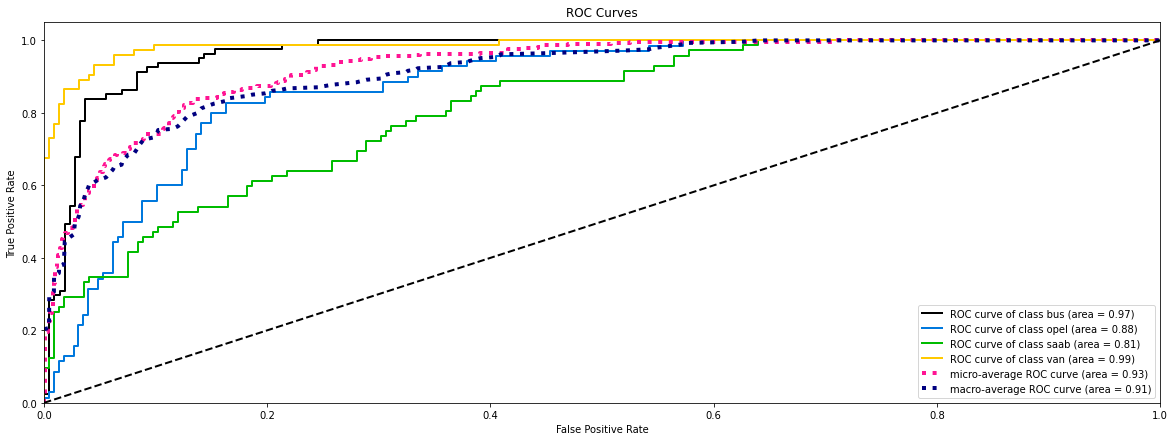

In [13]:
print('accuracy_score=', accuracy_score(y_test, lr.predict(X_test_pca)))
print('f1_score=', f1_score(y_test, lr.predict(X_test_pca), average='macro'))

scplt.metrics.plot_roc(y_test, lr.predict_proba(X_test_pca), figsize=(20, 7))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [14]:
from sklearn.tree import DecisionTreeClassifier

p = Pipeline([
    ('scale', StandardScaler()),
    ('pca', pca),
    ('clf', DecisionTreeClassifier())
])

params = {
    'clf__max_depth' : np.arange(1, 101)
}

tr = GridSearchCV(p, params, n_jobs=-1, verbose=5).fit(X_train_pca, y_train)
print(f'max_depth best value: ' + str(tr.best_params_))

est = tr.best_estimator_
print('accuracy_score=', accuracy_score(y_test, est.predict(X_test_pca)))
print('f1_score=', f1_score(y_test, est.predict(X_test_pca), average='macro'))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
max_depth best value: {'clf__max_depth': 44}
accuracy_score= 0.6363636363636364
f1_score= 0.6305827254616196


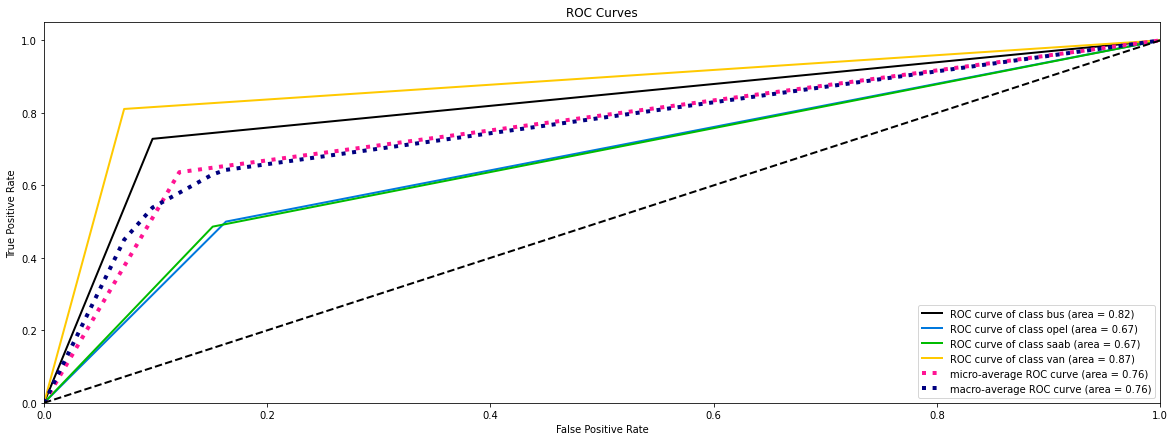

In [15]:
scplt.metrics.plot_roc(y_test, tr.predict_proba(X_test_pca), figsize=(20, 7))

**Важное замечание перед тем как мы продолжим**: Все эти модели показали точность меньшую чем базовая, значит можем сделать выврд что PCA приводит к потере важной информации. А значит при PCA нам не хватает данных данных для построения хороших моделей. Поэтому дальше я не буду вставлять PCA.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [33]:
from sklearn.ensemble import BaggingClassifier

models, names = [LogisticRegression, DecisionTreeClassifier], ['Logistic regression', 'Decision Tree']
params = [
    {
        'multi_class' : 'multinomial',
        'solver' :'saga',
        'tol' : 1e-3,
        'C' : 1.90 # см пункт 2.4
    },
    {
        'max_depth' : 44 # см. пред. пункт
    }
]

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=[f'Plot of {score} w.r.t. the size of the ensemble (Bagging)'
                        for score in ['f1_score', 'accuracy_score']]
)

for i, model in enumerate(models):
  f1_test, f1_train = [], []
  accurancy_test, accurancy_train = [], []

  for n in np.arange(2, 100, 5):
        p = Pipeline([
            ('scale', StandardScaler()),
            ('clf', BaggingClassifier(model(**params[i]), n_estimators=n, n_jobs=-1))])

        p.fit(X_train, y_train)

        f1_test.append(f1_score(y_test, p.predict(X_test), average='macro'))
        f1_train.append(f1_score(y_train, p.predict(X_train), average='macro'))

        accurancy_test.append(accuracy_score(y_test, p.predict(X_test)))
        accurancy_train.append(accuracy_score(y_train, p.predict(X_train)))
  
  add_subplot(fig, np.arange(2, 100, 5), f1_test, f'{names[i]}: f1_test_score', 'f1_score', 1, 1)
  add_subplot(fig, np.arange(2, 100, 5), f1_train, f'{names[i]}: f1_train_score', 'f1_score', 1, 1)
  add_subplot(fig, np.arange(2, 100, 5), accurancy_test, f'{names[i]}: accurancy_test_score', 'accurancy_score', 2, 1)
  add_subplot(fig, np.arange(2, 100, 5), accurancy_train, f'{names[i]}: accurancy_train_score', 'accurancy_score', 2, 1)


In [34]:
fig.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [22]:
from sklearn.ensemble import RandomForestClassifier
import plotly
from plotly.subplots import make_subplots

f1_test, f1_train = [], []

accurancy_test, accurancy_train = [], []

def add_subplot(fig, x, y, name, title, row, col):
  fig.add_trace(
      plotly.graph_objects.Scatter(
          x=x, y=y, name=name
      ), 
      row=row, col=col
  )
  fig.update_yaxes(title_text=title, row=row, col=col)

for number_of_trees in np.arange(1, 100, 1):
  p = Pipeline([
      ('scale', StandardScaler()),
      ('clf', RandomForestClassifier(n_estimators=number_of_trees))
  ])

  p.fit(X_train, y_train)

  f1_test.append(f1_score(y_test, p.predict(X_test), average='macro'))
  f1_train.append(f1_score(y_train, p.predict(X_train), average='macro'))

  accurancy_test.append(accuracy_score(y_test, p.predict(X_test)))
  accurancy_train.append(accuracy_score(y_train, p.predict(X_train)))

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f'Plot of {score} w.r.t. the number of trees ' for score in ['test_score', 'train_score']]
)

add_subplot(fig, np.arange(1, 100, 1), f1_test, 'Random Forest: f1_test_score', 'f1_score', 1, 1)
add_subplot(fig, np.arange(1, 100, 1), f1_train, 'Random Forest: f1_train_score', 'f1_score', 1, 2)
add_subplot(fig, np.arange(1, 100, 1), accurancy_test, 'Random Forest: accurancy_test_score', 'accurancy_score', 2, 1)
add_subplot(fig, np.arange(1, 100, 1), accurancy_train, 'Random Forest: accurancy_train_score', 'accurancy_score', 2, 2)

fig.show()

Вполне неплохой результат местами даже лучше чем у лог. рег(обычной), и даже Bagging'a(DecisionTreeClassifier) А оптимальное количество деревьев равно 35. Что впринципе ожидаемо(в плане что значение не маленькое но при том и не большое)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [39]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)
skf_iter = skf.split(X_train, y_train)
X_skf_train, y_skf_train = [], []

p = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial',
                                            solver='saga',
                                            tol=1e-3)
    )
])

params = {
    'clf__C' : np.linspace(0, 10, 100)
}

f1_scores, accurancy_scores = [], []
ind = []

for _, i in skf_iter:
    
    if len(X_skf_train) == 0:
        X_skf_train, y_skf_train = X_train[i], y_train[i]
    else:
        X_skf_train, y_skf_train = np.vstack((X_skf_train, X_train[i])), np.hstack((y_skf_train, y_train[i]))
        
    lr = GridSearchCV(p, params, n_jobs=-1, verbose=5)
    lr = lr.fit(X_skf_train, y_skf_train).best_estimator_
    
    f1 = f1_score(y_test, lr.predict(X_test), average='macro')
    accurancy = accuracy_score(y_test, lr.predict(X_test))

    print(f'f1_score={f1}\naccurancy_score={accurancy}')

    f1_scores.append(f1)
    accurancy_scores.append(accurancy)
    ind.append(X_skf_train.shape[0])

fig = plotly.graph_objects.Figure()

fig.add_trace(plotly.graph_objects.Scatter(
    x=ind, y=f1_scores,
    name='f1_score'
  ))

fig.add_trace(plotly.graph_objects.Scatter(
    x=ind, y=accurancy_scores,
    name='accuracy'
))

fig.update_layout(
    title={
        'text' : 'Plot of scores w.r.t dataset size',
    },
    xaxis_title='Dataset size',
    yaxis_title='Scores',
    width = 1500,
    height = 800)
fig.update_xaxes(tickvals=ind)

fig.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.6623403928074916
accurancy_score=0.6666666666666666
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.7022578117036169
accurancy_score=0.7171717171717171
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.744081210681171
accurancy_score=0.7609427609427609
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.7280318393455822
accurancy_score=0.7407407407407407
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.7700482480254403
accurancy_score=0.7777777777777778
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.7510406698564593
accurancy_score=0.7609427609427609
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.774016781740567
accurancy_score=0.7845117845117845
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.767814879500526
accurancy_score=0.7777777777777778
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

f1_score=0.7780632990109904
accurancy_score=0.7878787878787878
Fitting 5 folds for each of 100 candidates, totalling 500 fits
f1_score=0.7828057072925958
accurancy_score=0.7912457912457912


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  F

Графики показывают что в целом при увеличении размера датасета скоры метрик увеличичаются. Однако могут быть случаи что при меньшем размере точность может быть лучше. Так-же очевидно что в какой-то момент рост стабилизируется.